In [2]:
!pip install --upgrade pip
!pip install joblib

     |████████████████████████████████| 2.1 MB 5.7 MB/s eta 0:00:01
  Attempting uninstall: pip
    Found existing installation: pip 20.1.1
    Uninstalling pip-20.1.1:
      Successfully uninstalled pip-20.1.1


In [3]:
import matplotlib.pyplot as plt
import joblib
import os
import cv2
import numpy as np
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import models, layers

In [4]:
# Define a function to load images from a folder
def load_images_from_folder(folder):

  # Create empty lists to store the images and labels
  images = []
  labels = []

  # Iterate over all of the files in the folder
  for filename in os.listdir(folder):

    # Read the image into memory
    img = cv2.imread(os.path.join(folder,filename), cv2.IMREAD_GRAYSCALE)

    # Check to make sure that the image is not None
    if img is not None:

      # Add the image and label to the corresponding lists
      images.append(img)
      labels.append(int(filename.split('_')[0].split('.')[0]))

  # Return the images and labels
  return images, labels

# Load the training and test datasets
x_train, y_train = load_images_from_folder('/kaggle/input/fingerprint-dataset-for-fvc2000-db4-b/dataset_FVC2000_DB4_B/dataset/train_data')
x_test, y_test = load_images_from_folder('/kaggle/input/fingerprint-dataset-for-fvc2000-db4-b/dataset_FVC2000_DB4_B/dataset/real_data')

# Print the number of training images and the shape of the first training image
print("Number of training images:", len(x_train))
print("Shape of the first training image:", x_train[0].shape)


Number of training images: 800
Shape of the first training image: (160, 160)


In [5]:
# Convert the list of training images to a NumPy array
x_train = np.array(x_train).reshape(-1, 160, 160, 1).astype('float32') / 255.0

# Convert the list of test images to a NumPy array
x_test = np.array(x_test).reshape(-1, 160, 160, 1).astype('float32') / 255.0

# Convert the list of training labels to one-hot format
y_train = to_categorical(y_train)

# Convert the list of test labels to one-hot format
y_test = to_categorical(y_test)


In [7]:
# Create a sequential model
model = models.Sequential()

# Add a convolutional layer with 32 filters of size 3x3
model.add(layers.Conv2D(32, (3, 3), activation="relu", input_shape=(160, 160, 1)))

# Add a max pooling layer with a pooling size of 2x2
model.add(layers.MaxPooling2D((2, 2)))

# Add another convolutional layer with 64 filters of size 3x3
model.add(layers.Conv2D(64, (3, 3), activation="relu"))

# Add another max pooling layer with a pooling size of 2x2
model.add(layers.MaxPooling2D((2, 2)))

# Flatten the output of the previous layer
model.add(layers.Flatten())

# Add a dense layer with 128 neurons
model.add(layers.Dense(128, activation="relu"))

# Add a dense layer with 10 neurons, one for each fingerprint class
model.add(layers.Dense(10, activation="softmax"))

# Compile the model using the Adam optimizer and the categorical cross-entropy loss function
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Train the model for 10 epochs on the training dataset
model.fit(x_train, y_train, epochs=10)

# Evaluate the model on the test dataset and print the test loss and test accuracy
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])



Epoch 1/10
25/25 [==============================] - 18s 714ms/step - loss: 3.0556 - accuracy: 0.0975
Epoch 2/10
25/25 [==============================] - 18s 713ms/step - loss: 2.2838 - accuracy: 0.1363
Epoch 3/10
25/25 [==============================] - 17s 700ms/step - loss: 2.1217 - accuracy: 0.2562
Epoch 4/10
25/25 [==============================] - 18s 721ms/step - loss: 1.6750 - accuracy: 0.4387
Epoch 5/10
25/25 [==============================] - 18s 702ms/step - loss: 1.1261 - accuracy: 0.6562
Epoch 6/10
25/25 [==============================] - 18s 720ms/step - loss: 0.7594 - accuracy: 0.7650
Epoch 7/10
25/25 [==============================] - 18s 703ms/step - loss: 0.5519 - accuracy: 0.8575
Epoch 8/10
25/25 [==============================] - 18s 729ms/step - loss: 0.4441 - accuracy: 0.8750
Epoch 9/10
25/25 [==============================] - 18s 721ms/step - loss: 0.3572 - accuracy: 0.9300
Epoch 10/10
25/25 [==============================] - 18s 709ms/step - loss: 0.2188 - accura

In [9]:
history = model.fit(x_train, y_train, epochs=25, validation_data=(x_test, y_test))

Epoch 1/25
25/25 [==============================] - 18s 710ms/step - loss: 8.8557e-04 - accuracy: 1.0000 - val_loss: 1.1564 - val_accuracy: 0.7000
Epoch 2/25
25/25 [==============================] - 18s 724ms/step - loss: 8.3691e-04 - accuracy: 1.0000 - val_loss: 1.1438 - val_accuracy: 0.7000
Epoch 3/25
25/25 [==============================] - 17s 696ms/step - loss: 7.6890e-04 - accuracy: 1.0000 - val_loss: 1.1387 - val_accuracy: 0.7000
Epoch 4/25
25/25 [==============================] - 18s 723ms/step - loss: 7.4242e-04 - accuracy: 1.0000 - val_loss: 1.1590 - val_accuracy: 0.6000
Epoch 5/25
25/25 [==============================] - 17s 699ms/step - loss: 6.8564e-04 - accuracy: 1.0000 - val_loss: 1.1512 - val_accuracy: 0.7000
Epoch 6/25
25/25 [==============================] - 18s 718ms/step - loss: 6.4922e-04 - accuracy: 1.0000 - val_loss: 1.1428 - val_accuracy: 0.7000
Epoch 7/25
25/25 [==============================] - 18s 728ms/step - loss: 6.2673e-04 - accuracy: 1.0000 - val_loss: 1

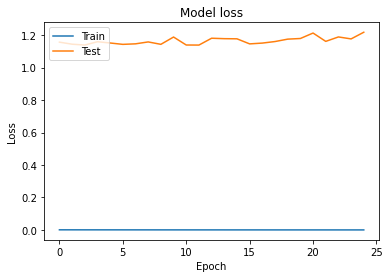

In [10]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [11]:
# Register a fingerprint
def register_fingerprint(image):

    # Pre-process the image
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = cv2.resize(image, (160, 160))
    image = image.reshape(-1, 160, 160, 1).astype('float32') / 255.0

    # Predict the fingerprint features
    features = model.predict(image)

    # Save the features
    features = features.flatten()
    with open('fingerprint_features.pickle', 'wb') as f:
        joblib.dump(features, f)

# Authenticate a fingerprint
def authenticate_fingerprint(image):

    # Pre-process the image
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = cv2.resize(image, (160, 160))
    image = image.reshape(-1, 160, 160, 1).astype('float32') / 255.0

    # Predict the fingerprint features
    features = model.predict(image)

    # Compare the features
    with open('fingerprint_features.pickle', 'rb') as f:
        known_features = joblib.load(f)

    # Use the distance function to compare the features
    dist = np.linalg.norm(features - known_features, axis=1)

    # Authentication result
    if dist < 0.01:
        return True
    else:
        return False


In [12]:
# Load the fingerprint image
image = cv2.imread('FingerPrintOriginal.jpg')

# Register the fingerprint features
register_fingerprint(image)

# Authenticate the fingerprint
is_authenticated = authenticate_fingerprint(image)

# Print the authentication result
print(is_authenticated)


error: OpenCV(4.2.0) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'
